<a href="https://colab.research.google.com/github/TenzinYangzom158/NLTK/blob/main/NLP_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab3. Write a program to program to tokenize Non-English Languages**

### Tokenization is breaking the raw text into small chunks. Tokenization breaks the raw text into words, sentences called tokens. 

In [1]:
# import the library
import nltk
nltk.download('punkt')
import nltk.data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
import matplotlib.pyplot as plt

In [3]:
# add necessary libraries
from nltk.corpus import stopwords
from nltk.tokenize import (word_tokenize, 
                          sent_tokenize,
                           RegexpTokenizer,
                           wordpunct_tokenize,
                           TreebankWordTokenizer, 
                           TweetTokenizer,
                           MWETokenizer)
# TreebankWordTokenizer and MWETokenizer works but not useful

from nltk.probability import FreqDist

from nltk.stem import PorterStemmer
import math

In [4]:
!git clone https://github.com/TenzinYangzom158/NLTK.git

Cloning into 'NLTK'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 22 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.


Importing Hindi text from the text file

In [5]:
text = open('NLTK/hindi.txt')
sen = text.read()
print(sen)

आदरणीय अध्यक्षा जी, मैं आपका आभार व्\यक्\त करता हूं, जिस धैर्य के साथ आपने सदन का आज संचालन किया है। यह अविश्\वास प्रस्\ताव एक प्रकार से हमारे लोकतंत्र की महत्\वपूर्ण शक्ति का परिचायक है। भले ही टीडीपी के माध् यम से यह प्रस्ताव आया हो, लेकिन उनके साथ जुड़े हुए कुछ माननीय सदस्\यों ने प्रस्\ताव का समर्थन करते हुए बातें कही है।


Printing Hindi Stop words

In [6]:
hin_stops = open('NLTK/hindi_stopwords.txt')

stopwords=[]
for x in hin_stops:
   stopwords.append(x)
print(stopwords)

['अत\n', 'अपना\n', 'अपनी\n', 'अपने\n', 'अभी\n', 'अंदर\n', 'आदि\n', 'आप\n', 'इत्यादि\n', 'इन \n', 'इनका\n', 'इन्हीं\n', 'इन्हें\n', 'इन्हों\n', 'इस\n', 'इसका\n', 'इसकी\n', 'इसके\n', 'इसमें\n', 'इसी\n', 'इसे\n', 'उन\n', 'उनका\n', 'उनकी\n', 'उनके\n', 'उनको\n', 'उन्हीं\n', 'उन्हें\n', 'उन्हों\n', 'उस\n', 'उसके\n', 'उसी\n', 'उसे\n', 'एक\n', 'एवं\n', 'एस\n', 'ऐसे\n', 'और\n', 'कई\n', 'कर\n', 'करता\n', 'करते\n', 'करना\n', 'करने\n', 'करें\n', 'कहते\n', 'कहा\n', 'का\n', 'काफ़ी\n', 'कि\n', 'कितना\n', 'किन्हें\n', 'किन्हों\n', 'किया\n', 'किर\n', 'किस\n', 'किसी\n', 'किसे\n', 'की\n', 'कुछ\n', 'कुल\n', 'के\n', 'को\n', 'कोई\n', 'कौन\n', 'कौनसा\n', 'गया\n', 'घर\n', 'जब\n', 'जहाँ\n', 'जा\n', 'जितना\n', 'जिन\n', 'जिन्हें\n', 'जिन्हों\n', 'जिस\n', 'जिसे\n', 'जीधर\n', 'जैसा\n', 'जैसे\n', 'जो\n', 'तक\n', 'तब\n', 'तरह\n', 'तिन\n', 'तिन्हें\n', 'तिन्हों\n', 'तिस\n', 'तिसे\n', 'तो\n', 'था\n', 'थी\n', 'थे\n', 'दबारा\n', 'दिया\n', 'दुसरा\n', 'दूसरे\n', 'दो\n', 'द्वारा\n', 'न\n', 'नके\n', 'नहीं\n', 'ना\n', 'निहायत

### Tokenization on Hindi language

In [7]:
# 1. White Space Tokenization
print("Full sentence: ",sen)
print("After white space tokenization: ",word_tokenize(sen))

Full sentence:  आदरणीय अध्यक्षा जी, मैं आपका आभार व्\यक्\त करता हूं, जिस धैर्य के साथ आपने सदन का आज संचालन किया है। यह अविश्\वास प्रस्\ताव एक प्रकार से हमारे लोकतंत्र की महत्\वपूर्ण शक्ति का परिचायक है। भले ही टीडीपी के माध् यम से यह प्रस्ताव आया हो, लेकिन उनके साथ जुड़े हुए कुछ माननीय सदस्\यों ने प्रस्\ताव का समर्थन करते हुए बातें कही है।
After white space tokenization:  ['आदरणीय', 'अध्यक्षा', 'जी', ',', 'मैं', 'आपका', 'आभार', 'व्\\यक्\\त', 'करता', 'हूं', ',', 'जिस', 'धैर्य', 'के', 'साथ', 'आपने', 'सदन', 'का', 'आज', 'संचालन', 'किया', 'है।', 'यह', 'अविश्\\वास', 'प्रस्\\ताव', 'एक', 'प्रकार', 'से', 'हमारे', 'लोकतंत्र', 'की', 'महत्\\वपूर्ण', 'शक्ति', 'का', 'परिचायक', 'है।', 'भले', 'ही', 'टीडीपी', 'के', 'माध्', 'यम', 'से', 'यह', 'प्रस्ताव', 'आया', 'हो', ',', 'लेकिन', 'उनके', 'साथ', 'जुड़े', 'हुए', 'कुछ', 'माननीय', 'सदस्\\यों', 'ने', 'प्रस्\\ताव', 'का', 'समर्थन', 'करते', 'हुए', 'बातें', 'कही', 'है।']


In [8]:
# 2. Sentence Tokenizer
print(sent_tokenize(sen))
print(sen.split('।'))

['आदरणीय अध्यक्षा जी, मैं आपका आभार व्\\यक्\\त करता हूं, जिस धैर्य के साथ आपने सदन का आज संचालन किया है। यह अविश्\\वास प्रस्\\ताव एक प्रकार से हमारे लोकतंत्र की महत्\\वपूर्ण शक्ति का परिचायक है। भले ही टीडीपी के माध् यम से यह प्रस्ताव आया हो, लेकिन उनके साथ जुड़े हुए कुछ माननीय सदस्\\यों ने प्रस्\\ताव का समर्थन करते हुए बातें कही है।']
['आदरणीय अध्यक्षा जी, मैं आपका आभार व्\\यक्\\त करता हूं, जिस धैर्य के साथ आपने सदन का आज संचालन किया है', ' यह अविश्\\वास प्रस्\\ताव एक प्रकार से हमारे लोकतंत्र की महत्\\वपूर्ण शक्ति का परिचायक है', ' भले ही टीडीपी के माध् यम से यह प्रस्ताव आया हो, लेकिन उनके साथ जुड़े हुए कुछ माननीय सदस्\\यों ने प्रस्\\ताव का समर्थन करते हुए बातें कही है', '']


In [9]:
# 3. Regexp Tokenizer
tokenizer = RegexpTokenizer('[^आ]')
tokenizer.tokenize(sen)

['द',
 'र',
 'ण',
 'ी',
 'य',
 ' ',
 'अ',
 'ध',
 '्',
 'य',
 'क',
 '्',
 'ष',
 'ा',
 ' ',
 'ज',
 'ी',
 ',',
 ' ',
 'म',
 'ै',
 'ं',
 ' ',
 'प',
 'क',
 'ा',
 ' ',
 'भ',
 'ा',
 'र',
 ' ',
 'व',
 '्',
 '\\',
 'य',
 'क',
 '्',
 '\\',
 'त',
 ' ',
 'क',
 'र',
 'त',
 'ा',
 ' ',
 'ह',
 'ू',
 'ं',
 ',',
 ' ',
 'ज',
 'ि',
 'स',
 ' ',
 'ध',
 'ै',
 'र',
 '्',
 'य',
 ' ',
 'क',
 'े',
 ' ',
 'स',
 'ा',
 'थ',
 ' ',
 'प',
 'न',
 'े',
 ' ',
 'स',
 'द',
 'न',
 ' ',
 'क',
 'ा',
 ' ',
 'ज',
 ' ',
 'स',
 'ं',
 'च',
 'ा',
 'ल',
 'न',
 ' ',
 'क',
 'ि',
 'य',
 'ा',
 ' ',
 'ह',
 'ै',
 '।',
 ' ',
 'य',
 'ह',
 ' ',
 'अ',
 'व',
 'ि',
 'श',
 '्',
 '\\',
 'व',
 'ा',
 'स',
 ' ',
 'प',
 '्',
 'र',
 'स',
 '्',
 '\\',
 'त',
 'ा',
 'व',
 ' ',
 'ए',
 'क',
 ' ',
 'प',
 '्',
 'र',
 'क',
 'ा',
 'र',
 ' ',
 'स',
 'े',
 ' ',
 'ह',
 'म',
 'ा',
 'र',
 'े',
 ' ',
 'ल',
 'ो',
 'क',
 'त',
 'ं',
 'त',
 '्',
 'र',
 ' ',
 'क',
 'ी',
 ' ',
 'म',
 'ह',
 'त',
 '्',
 '\\',
 'व',
 'प',
 'ू',
 'र',
 '्',
 'ण',
 ' ',
 'श',
 'क',
 '्',
 'त',

In [10]:
# 4. Punctuation based tokenizer
print(wordpunct_tokenize(sen))

['आदरण', 'ी', 'य', 'अध', '्', 'यक', '्', 'ष', 'ा', 'ज', 'ी,', 'म', 'ैं', 'आपक', 'ा', 'आभ', 'ा', 'र', 'व', '्\\', 'यक', '्\\', 'त', 'करत', 'ा', 'ह', 'ूं,', 'ज', 'ि', 'स', 'ध', 'ै', 'र', '्', 'य', 'क', 'े', 'स', 'ा', 'थ', 'आपन', 'े', 'सदन', 'क', 'ा', 'आज', 'स', 'ं', 'च', 'ा', 'लन', 'क', 'ि', 'य', 'ा', 'ह', 'ै।', 'यह', 'अव', 'ि', 'श', '्\\', 'व', 'ा', 'स', 'प', '्', 'रस', '्\\', 'त', 'ा', 'व', 'एक', 'प', '्', 'रक', 'ा', 'र', 'स', 'े', 'हम', 'ा', 'र', 'े', 'ल', 'ो', 'कत', 'ं', 'त', '्', 'र', 'क', 'ी', 'महत', '्\\', 'वप', 'ू', 'र', '्', 'ण', 'शक', '्', 'त', 'ि', 'क', 'ा', 'पर', 'ि', 'च', 'ा', 'यक', 'ह', 'ै।', 'भल', 'े', 'ह', 'ी', 'ट', 'ी', 'ड', 'ी', 'प', 'ी', 'क', 'े', 'म', 'ा', 'ध', '्', 'यम', 'स', 'े', 'यह', 'प', '्', 'रस', '्', 'त', 'ा', 'व', 'आय', 'ा', 'ह', 'ो,', 'ल', 'े', 'क', 'ि', 'न', 'उनक', 'े', 'स', 'ा', 'थ', 'ज', 'ु', 'ड', '़े', 'ह', 'ु', 'ए', 'क', 'ु', 'छ', 'म', 'ा', 'नन', 'ी', 'य', 'सदस', '्\\', 'य', 'ों', 'न', 'े', 'प', '्', 'रस', '्\\', 'त', 'ा', 'व', 'क', 'ा', 'समर', '्', 'थन

In [11]:
# 5. Tweet Tokenizer
tweet = "आदरणीय अध्यक्षा जी, मैं आपका आभार व्\यक्\त करता हूं 👩‍💻 "
tokenizer = TweetTokenizer()
print(tokenizer.tokenize(tweet))

['आदरणीय', 'अध्यक्षा', 'जी', ',', 'मैं', 'आपका', 'आभार', 'व्', '\\', 'यक्', '\\', 'त', 'करता', 'हूं', '👩\u200d💻']


In [12]:
# stop words in hindi
stop=open('NLTK/hindi_stopwords.txt')
stopwords=[]
for x in stop:
   stopwords.append(x)
print(stopwords)

['अत\n', 'अपना\n', 'अपनी\n', 'अपने\n', 'अभी\n', 'अंदर\n', 'आदि\n', 'आप\n', 'इत्यादि\n', 'इन \n', 'इनका\n', 'इन्हीं\n', 'इन्हें\n', 'इन्हों\n', 'इस\n', 'इसका\n', 'इसकी\n', 'इसके\n', 'इसमें\n', 'इसी\n', 'इसे\n', 'उन\n', 'उनका\n', 'उनकी\n', 'उनके\n', 'उनको\n', 'उन्हीं\n', 'उन्हें\n', 'उन्हों\n', 'उस\n', 'उसके\n', 'उसी\n', 'उसे\n', 'एक\n', 'एवं\n', 'एस\n', 'ऐसे\n', 'और\n', 'कई\n', 'कर\n', 'करता\n', 'करते\n', 'करना\n', 'करने\n', 'करें\n', 'कहते\n', 'कहा\n', 'का\n', 'काफ़ी\n', 'कि\n', 'कितना\n', 'किन्हें\n', 'किन्हों\n', 'किया\n', 'किर\n', 'किस\n', 'किसी\n', 'किसे\n', 'की\n', 'कुछ\n', 'कुल\n', 'के\n', 'को\n', 'कोई\n', 'कौन\n', 'कौनसा\n', 'गया\n', 'घर\n', 'जब\n', 'जहाँ\n', 'जा\n', 'जितना\n', 'जिन\n', 'जिन्हें\n', 'जिन्हों\n', 'जिस\n', 'जिसे\n', 'जीधर\n', 'जैसा\n', 'जैसे\n', 'जो\n', 'तक\n', 'तब\n', 'तरह\n', 'तिन\n', 'तिन्हें\n', 'तिन्हों\n', 'तिस\n', 'तिसे\n', 'तो\n', 'था\n', 'थी\n', 'थे\n', 'दबारा\n', 'दिया\n', 'दुसरा\n', 'दूसरे\n', 'दो\n', 'द्वारा\n', 'न\n', 'नके\n', 'नहीं\n', 'ना\n', 'निहायत

In [13]:
def createfrequencytable(text_string) -> dict:
   stopWords = set(stopwords)
   words = word_tokenize(text_string)
   ps = PorterStemmer()
   print(ps)
   
   freqTable = dict()
   for word in words:
      word=str(word)
      # stemming
      word = ps.stem(word)
      print(word)
      if word in stopWords:
         continue
      if word in freqTable:
         freqTable[word] += 1
      else:
         freqTable[word] = 1
   return freqTable
ft=createfrequencytable(sen)
print(ft)

<PorterStemmer>
आदरणीय
अध्यक्षा
जी
,
मैं
आपका
आभार
व्\यक्\त
करता
हूं
,
जिस
धैर्य
के
साथ
आपने
सदन
का
आज
संचालन
किया
है।
यह
अविश्\वास
प्रस्\ताव
एक
प्रकार
से
हमारे
लोकतंत्र
की
महत्\वपूर्ण
शक्ति
का
परिचायक
है।
भले
ही
टीडीपी
के
माध्
यम
से
यह
प्रस्ताव
आया
हो
,
लेकिन
उनके
साथ
जुड़े
हुए
कुछ
माननीय
सदस्\यों
ने
प्रस्\ताव
का
समर्थन
करते
हुए
बातें
कही
है।
{'आदरणीय': 1, 'अध्यक्षा': 1, 'जी': 1, ',': 3, 'मैं': 1, 'आपका': 1, 'आभार': 1, 'व्\\यक्\\त': 1, 'करता': 1, 'हूं': 1, 'जिस': 1, 'धैर्य': 1, 'के': 2, 'साथ': 2, 'आपने': 1, 'सदन': 1, 'का': 3, 'आज': 1, 'संचालन': 1, 'किया': 1, 'है।': 3, 'यह': 2, 'अविश्\\वास': 1, 'प्रस्\\ताव': 2, 'एक': 1, 'प्रकार': 1, 'से': 2, 'हमारे': 1, 'लोकतंत्र': 1, 'की': 1, 'महत्\\वपूर्ण': 1, 'शक्ति': 1, 'परिचायक': 1, 'भले': 1, 'ही': 1, 'टीडीपी': 1, 'माध्': 1, 'यम': 1, 'प्रस्ताव': 1, 'आया': 1, 'हो': 1, 'लेकिन': 1, 'उनके': 1, 'जुड़े': 1, 'हुए': 2, 'कुछ': 1, 'माननीय': 1, 'सदस्\\यों': 1, 'ने': 1, 'समर्थन': 1, 'करते': 1, 'बातें': 1, 'कही': 1}


In [14]:
hindi_fdist = nltk.FreqDist(ft)
hindi_fdist.most_common(100)

[(',', 3),
 ('का', 3),
 ('है।', 3),
 ('के', 2),
 ('साथ', 2),
 ('यह', 2),
 ('प्रस्\\ताव', 2),
 ('से', 2),
 ('हुए', 2),
 ('आदरणीय', 1),
 ('अध्यक्षा', 1),
 ('जी', 1),
 ('मैं', 1),
 ('आपका', 1),
 ('आभार', 1),
 ('व्\\यक्\\त', 1),
 ('करता', 1),
 ('हूं', 1),
 ('जिस', 1),
 ('धैर्य', 1),
 ('आपने', 1),
 ('सदन', 1),
 ('आज', 1),
 ('संचालन', 1),
 ('किया', 1),
 ('अविश्\\वास', 1),
 ('एक', 1),
 ('प्रकार', 1),
 ('हमारे', 1),
 ('लोकतंत्र', 1),
 ('की', 1),
 ('महत्\\वपूर्ण', 1),
 ('शक्ति', 1),
 ('परिचायक', 1),
 ('भले', 1),
 ('ही', 1),
 ('टीडीपी', 1),
 ('माध्', 1),
 ('यम', 1),
 ('प्रस्ताव', 1),
 ('आया', 1),
 ('हो', 1),
 ('लेकिन', 1),
 ('उनके', 1),
 ('जुड़े', 1),
 ('कुछ', 1),
 ('माननीय', 1),
 ('सदस्\\यों', 1),
 ('ने', 1),
 ('समर्थन', 1),
 ('करते', 1),
 ('बातें', 1),
 ('कही', 1)]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2366 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2361 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2375 missing from current font.
  font.set_text(s

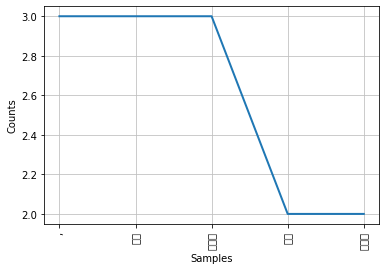

In [18]:
hindi_fdist.plot(5)

### Tokenization on Spanish Language

In [19]:
spanish_tokenizer = nltk.data.load('tokenizers/punkt/PY3/spanish.pickle') 
text = 'Hola amigo. Me llamo Ankit.'
spanish_tokenizer.tokenize(text)

['Hola amigo.', 'Me llamo Ankit.']

In [20]:
Sample_text = "Hola a todos, su aprendizaje de tokenización de diferentes idiomas."
spanish_tokenizer.tokenize(Sample_text)

['Hola a todos, su aprendizaje de tokenización de diferentes idiomas.']

Using Spacy Tokenizer

In [21]:
import spacy

In [22]:
# download spanish-language-model

!python -m spacy download es_core_news_md

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


In [23]:
# load the language model
nlp = spacy.load('es_core_news_md')

In [24]:
spanish_text = open('NLTK/spanish.txt')
text = spanish_text.read()
print(text)
document = nlp(text) #Whenever we use spaCy, our first step will be to create a processed spaCy document with the loaded NLP model nlp().

Mi familia no es muy grande, somos solo cuatro personas: mi padre, mi madre, mi hermana y yo. También tenemos un perro.

Yo soy mayor que mi hermana, pero ella es más alta. Yo tengo doce años y ella once. Mis padres se llaman Javier y María, mi hermana se llama Sara y yo Luis. Vivimos todos juntos en una casa muy bonita.

Mi padre es banquero y mi madre ama de casa. Por la mañana, desayunamos juntos en la cocina. Me gusta desayunar con mi familia. Además, por las mañanas siempre tengo hambre. Después del colegio, mi madre prepara una comida deliciosa. Por la tarde, mi madre queda con sus amigas, y mi padre juega al tenis. Mi hermana y yo hacemos los deberes, y después vemos la televisión. Los viernes por la tarde vamos los cuatro de compras.


In [25]:
# for token in document:
#     print(token.lemma_, token.pos_, token.dep_)

In [26]:
for token in document:
  print(token, token.idx)

Mi 0
familia 3
no 11
es 14
muy 17
grande 21
, 27
somos 29
solo 35
cuatro 40
personas 47
: 55
mi 57
padre 60
, 65
mi 67
madre 70
, 75
mi 77
hermana 80
y 88
yo 90
. 92
También 94
tenemos 102
un 110
perro 113
. 118


 119
Yo 121
soy 124
mayor 128
que 134
mi 138
hermana 141
, 148
pero 150
ella 155
es 160
más 163
alta 167
. 171
Yo 173
tengo 176
doce 182
años 187
y 192
ella 194
once 199
. 203
Mis 205
padres 209
se 216
llaman 219
Javier 226
y 233
María 235
, 240
mi 242
hermana 245
se 253
llama 256
Sara 262
y 267
yo 269
Luis 272
. 276
Vivimos 278
todos 286
juntos 292
en 299
una 302
casa 306
muy 311
bonita 315
. 321


 322
Mi 324
padre 327
es 333
banquero 336
y 345
mi 347
madre 350
ama 356
de 360
casa 363
. 367
Por 369
la 373
mañana 376
, 382
desayunamos 384
juntos 396
en 403
la 406
cocina 409
. 415
Me 417
gusta 420
desayunar 426
con 436
mi 440
familia 443
. 450
Además 452
, 458
por 460
las 464
mañanas 468
siempre 476
tengo 484
hambre 490
. 496
Después 498
del 506
colegio 510
, 517
mi 519
madre

In [27]:
word_token = word_tokenize(text)
print(word_token)

['Mi', 'familia', 'no', 'es', 'muy', 'grande', ',', 'somos', 'solo', 'cuatro', 'personas', ':', 'mi', 'padre', ',', 'mi', 'madre', ',', 'mi', 'hermana', 'y', 'yo', '.', 'También', 'tenemos', 'un', 'perro', '.', 'Yo', 'soy', 'mayor', 'que', 'mi', 'hermana', ',', 'pero', 'ella', 'es', 'más', 'alta', '.', 'Yo', 'tengo', 'doce', 'años', 'y', 'ella', 'once', '.', 'Mis', 'padres', 'se', 'llaman', 'Javier', 'y', 'María', ',', 'mi', 'hermana', 'se', 'llama', 'Sara', 'y', 'yo', 'Luis', '.', 'Vivimos', 'todos', 'juntos', 'en', 'una', 'casa', 'muy', 'bonita', '.', 'Mi', 'padre', 'es', 'banquero', 'y', 'mi', 'madre', 'ama', 'de', 'casa', '.', 'Por', 'la', 'mañana', ',', 'desayunamos', 'juntos', 'en', 'la', 'cocina', '.', 'Me', 'gusta', 'desayunar', 'con', 'mi', 'familia', '.', 'Además', ',', 'por', 'las', 'mañanas', 'siempre', 'tengo', 'hambre', '.', 'Después', 'del', 'colegio', ',', 'mi', 'madre', 'prepara', 'una', 'comida', 'deliciosa', '.', 'Por', 'la', 'tarde', ',', 'mi', 'madre', 'queda', 'co

In [28]:
# stopwords in spanish
stop=open('NLTK/spanish_stopwords.txt')
s_stopwords=[]
for x in stop:
   s_stopwords.append(x)
print(s_stopwords)

['0\n', '1\n', '2\n', '3\n', '4\n', '5\n', '6\n', '7\n', '8\n', '9\n', '_\n', 'a\n', 'actualmente\n', 'acuerdo\n', 'adelante\n', 'ademas\n', 'además\n', 'adrede\n', 'afirmó\n', 'agregó\n', 'ahi\n', 'ahora\n', 'ahí\n', 'al\n', 'algo\n', 'alguna\n', 'algunas\n', 'alguno\n', 'algunos\n', 'algún\n', 'alli\n', 'allí\n', 'alrededor\n', 'ambos\n', 'ampleamos\n', 'antano\n', 'antaño\n', 'ante\n', 'anterior\n', 'antes\n', 'apenas\n', 'aproximadamente\n', 'aquel\n', 'aquella\n', 'aquellas\n', 'aquello\n', 'aquellos\n', 'aqui\n', 'aquél\n', 'aquélla\n', 'aquéllas\n', 'aquéllos\n', 'aquí\n', 'arriba\n', 'arribaabajo\n', 'aseguró\n', 'asi\n', 'así\n', 'atras\n', 'aun\n', 'aunque\n', 'ayer\n', 'añadió\n', 'aún\n', 'b\n', 'bajo\n', 'bastante\n', 'bien\n', 'breve\n', 'buen\n', 'buena\n', 'buenas\n', 'bueno\n', 'buenos\n', 'c\n', 'cada\n', 'casi\n', 'cerca\n', 'cierta\n', 'ciertas\n', 'cierto\n', 'ciertos\n', 'cinco\n', 'claro\n', 'comentó\n', 'como\n', 'con\n', 'conmigo\n', 'conocer\n', 'conseguimos\n

In [29]:
# create words
filtered_sentences = [w for w in word_token if not w in stop]
print(filtered_sentences)

['Mi', 'familia', 'no', 'es', 'muy', 'grande', ',', 'somos', 'solo', 'cuatro', 'personas', ':', 'mi', 'padre', ',', 'mi', 'madre', ',', 'mi', 'hermana', 'y', 'yo', '.', 'También', 'tenemos', 'un', 'perro', '.', 'Yo', 'soy', 'mayor', 'que', 'mi', 'hermana', ',', 'pero', 'ella', 'es', 'más', 'alta', '.', 'Yo', 'tengo', 'doce', 'años', 'y', 'ella', 'once', '.', 'Mis', 'padres', 'se', 'llaman', 'Javier', 'y', 'María', ',', 'mi', 'hermana', 'se', 'llama', 'Sara', 'y', 'yo', 'Luis', '.', 'Vivimos', 'todos', 'juntos', 'en', 'una', 'casa', 'muy', 'bonita', '.', 'Mi', 'padre', 'es', 'banquero', 'y', 'mi', 'madre', 'ama', 'de', 'casa', '.', 'Por', 'la', 'mañana', ',', 'desayunamos', 'juntos', 'en', 'la', 'cocina', '.', 'Me', 'gusta', 'desayunar', 'con', 'mi', 'familia', '.', 'Además', ',', 'por', 'las', 'mañanas', 'siempre', 'tengo', 'hambre', '.', 'Después', 'del', 'colegio', ',', 'mi', 'madre', 'prepara', 'una', 'comida', 'deliciosa', '.', 'Por', 'la', 'tarde', ',', 'mi', 'madre', 'queda', 'co

In [30]:
# create a frequency distribution to find the most common words
fdist = nltk.FreqDist(filtered_sentences)
fdist.most_common(100)

[('.', 14),
 (',', 11),
 ('mi', 10),
 ('y', 8),
 ('la', 5),
 ('madre', 4),
 ('hermana', 4),
 ('Mi', 3),
 ('es', 3),
 ('padre', 3),
 ('yo', 3),
 ('familia', 2),
 ('muy', 2),
 ('cuatro', 2),
 ('Yo', 2),
 ('ella', 2),
 ('tengo', 2),
 ('se', 2),
 ('juntos', 2),
 ('en', 2),
 ('una', 2),
 ('casa', 2),
 ('de', 2),
 ('Por', 2),
 ('con', 2),
 ('por', 2),
 ('tarde', 2),
 ('los', 2),
 ('no', 1),
 ('grande', 1),
 ('somos', 1),
 ('solo', 1),
 ('personas', 1),
 (':', 1),
 ('También', 1),
 ('tenemos', 1),
 ('un', 1),
 ('perro', 1),
 ('soy', 1),
 ('mayor', 1),
 ('que', 1),
 ('pero', 1),
 ('más', 1),
 ('alta', 1),
 ('doce', 1),
 ('años', 1),
 ('once', 1),
 ('Mis', 1),
 ('padres', 1),
 ('llaman', 1),
 ('Javier', 1),
 ('María', 1),
 ('llama', 1),
 ('Sara', 1),
 ('Luis', 1),
 ('Vivimos', 1),
 ('todos', 1),
 ('bonita', 1),
 ('banquero', 1),
 ('ama', 1),
 ('mañana', 1),
 ('desayunamos', 1),
 ('cocina', 1),
 ('Me', 1),
 ('gusta', 1),
 ('desayunar', 1),
 ('Además', 1),
 ('las', 1),
 ('mañanas', 1),
 ('siempre

In [31]:
fdist.items()

dict_items([('Mi', 3), ('familia', 2), ('no', 1), ('es', 3), ('muy', 2), ('grande', 1), (',', 11), ('somos', 1), ('solo', 1), ('cuatro', 2), ('personas', 1), (':', 1), ('mi', 10), ('padre', 3), ('madre', 4), ('hermana', 4), ('y', 8), ('yo', 3), ('.', 14), ('También', 1), ('tenemos', 1), ('un', 1), ('perro', 1), ('Yo', 2), ('soy', 1), ('mayor', 1), ('que', 1), ('pero', 1), ('ella', 2), ('más', 1), ('alta', 1), ('tengo', 2), ('doce', 1), ('años', 1), ('once', 1), ('Mis', 1), ('padres', 1), ('se', 2), ('llaman', 1), ('Javier', 1), ('María', 1), ('llama', 1), ('Sara', 1), ('Luis', 1), ('Vivimos', 1), ('todos', 1), ('juntos', 2), ('en', 2), ('una', 2), ('casa', 2), ('bonita', 1), ('banquero', 1), ('ama', 1), ('de', 2), ('Por', 2), ('la', 5), ('mañana', 1), ('desayunamos', 1), ('cocina', 1), ('Me', 1), ('gusta', 1), ('desayunar', 1), ('con', 2), ('Además', 1), ('por', 2), ('las', 1), ('mañanas', 1), ('siempre', 1), ('hambre', 1), ('Después', 1), ('del', 1), ('colegio', 1), ('prepara', 1), ('

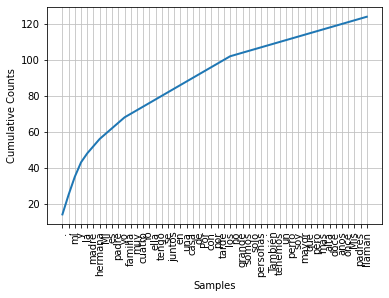

In [32]:
fdist.plot(50, cumulative = True)

Tibetan Language

In [33]:
!git clone https://github.com/TenzinYangzom158/NLTK.git

fatal: destination path 'NLTK' already exists and is not an empty directory.


In [34]:
tex = open('NLTK/tibetan.txt')
sen=tex.read()
print(sen)

༄༅། །འདིར་རྩོམ་པ་པོའི་སྔོན་གླེང་དུ། “ད་ཕན་རང་རེའི་སྤྱི་ཚོགས་ནང་ལབ་གླེང་དཀའ་རྙོག་འདྲ་མིན་བྱུང་ཁོངས་ནས་ཕྲན་བུའི་ཆེ་ཁག་འགའི་བྱུང་རིམ་གནས་ལུགས་དང་། གཞན་ཡང་རང་ཉིད་ཀྱི་ལས་རྒྱུན་རིང་སྐུ་སྒེར་ཡིག་ཚང་དང་འབྲེལ་བའི་བསམ་ཚུལ་རེ་ཟུང་རྒྱུས་མངའ་དཔང་པོའི་ཚུལ་དུ་བརྗོད་བདེ་གོ་སླའི་ཚིག་གིས་ཡིག་ངོ་ཤེས་ཚད་ཐམས་ཅད་ཀྱིས་ནང་དོན་མཁྱེན་རྟོགས་ཐུབ་པའི་རེ་སེམས་བཅངས་ཏེ་ཞོར་འཕྲོས་གསལ་བཤད་དང་བཅས་ཕྱོགས་སྒྲིག་བགྱིས།” ཞེས་གསུངས་འདུག་པ་ལྟར། དཔེ་དེབ་འདིར་༸གོང་ས་མཆོག་གི་མཛད་པ་ཆེ་ཁག་རྣམས་ཚིག་ཉུང་དོན་འདུས་ཀྱི་ལམ་ནས་རྩལ་འདོན་གནང་ཞིང་། དགོས་ངེས་ཅན་གྱི་བྱུང་བ་གནད་ཆེ་ཁག་ལ་ལོ་རྒྱུས་ཀྱི་རྒྱབ་ལྗོངས་དང་། ལོ་ཚིགས། ས་གནས། མི་སྣ། ཡིག་ཚགས་བཅས་ཀྱིས་མཚོན་དཔང་རྟགས་ཚད་ལྡན་གྱི་རྒྱས་བཏབ་འདུག་སྟབས་འདི་ལས་ལྷག་པའི་ཡིག་ཆ་ཁུངས་འཕེར་ཞིག་གནམ་མཐའ་བརྒལ་ཡང་རྙེད་རྒྱུ་དཀའ་སྙམ།


In [35]:
stop=open('NLTK/tibetan_stopwords.txt')
stopwords=[]
for x in stop:
   stopwords.append(x)
print(stopwords)

['།\n', '་\n', 'ཕན་']


In [36]:
sen.split("་")
words = sen.split("་")
print(words)

['༄༅། །འདིར', 'རྩོམ', 'པ', 'པོའི', 'སྔོན', 'གླེང', 'དུ། “ད', 'ཕན', 'རང', 'རེའི', 'སྤྱི', 'ཚོགས', 'ནང', 'ལབ', 'གླེང', 'དཀའ', 'རྙོག', 'འདྲ', 'མིན', 'བྱུང', 'ཁོངས', 'ནས', 'ཕྲན', 'བུའི', 'ཆེ', 'ཁག', 'འགའི', 'བྱུང', 'རིམ', 'གནས', 'ལུགས', 'དང', '། གཞན', 'ཡང', 'རང', 'ཉིད', 'ཀྱི', 'ལས', 'རྒྱུན', 'རིང', 'སྐུ', 'སྒེར', 'ཡིག', 'ཚང', 'དང', 'འབྲེལ', 'བའི', 'བསམ', 'ཚུལ', 'རེ', 'ཟུང', 'རྒྱུས', 'མངའ', 'དཔང', 'པོའི', 'ཚུལ', 'དུ', 'བརྗོད', 'བདེ', 'གོ', 'སླའི', 'ཚིག', 'གིས', 'ཡིག', 'ངོ', 'ཤེས', 'ཚད', 'ཐམས', 'ཅད', 'ཀྱིས', 'ནང', 'དོན', 'མཁྱེན', 'རྟོགས', 'ཐུབ', 'པའི', 'རེ', 'སེམས', 'བཅངས', 'ཏེ', 'ཞོར', 'འཕྲོས', 'གསལ', 'བཤད', 'དང', 'བཅས', 'ཕྱོགས', 'སྒྲིག', 'བགྱིས།” ཞེས', 'གསུངས', 'འདུག', 'པ', 'ལྟར། དཔེ', 'དེབ', 'འདིར', '༸གོང', 'ས', 'མཆོག', 'གི', 'མཛད', 'པ', 'ཆེ', 'ཁག', 'རྣམས', 'ཚིག', 'ཉུང', 'དོན', 'འདུས', 'ཀྱི', 'ལམ', 'ནས', 'རྩལ', 'འདོན', 'གནང', 'ཞིང', '། དགོས', 'ངེས', 'ཅན', 'གྱི', 'བྱུང', 'བ', 'གནད', 'ཆེ', 'ཁག', 'ལ', 'ལོ', 'རྒྱུས', 'ཀྱི', 'རྒྱབ', 'ལྗོངས', 'དང', '། ལོ', 'ཚིགས། ས', 'གནས། མི', 'སྣ། ཡིག', 'ཚགས'

In [37]:
stopWords = set(stopwords)
sentences = [w for w in words if not w in stopWords]
print(sentences)

['༄༅། །འདིར', 'རྩོམ', 'པ', 'པོའི', 'སྔོན', 'གླེང', 'དུ། “ད', 'ཕན', 'རང', 'རེའི', 'སྤྱི', 'ཚོགས', 'ནང', 'ལབ', 'གླེང', 'དཀའ', 'རྙོག', 'འདྲ', 'མིན', 'བྱུང', 'ཁོངས', 'ནས', 'ཕྲན', 'བུའི', 'ཆེ', 'ཁག', 'འགའི', 'བྱུང', 'རིམ', 'གནས', 'ལུགས', 'དང', '། གཞན', 'ཡང', 'རང', 'ཉིད', 'ཀྱི', 'ལས', 'རྒྱུན', 'རིང', 'སྐུ', 'སྒེར', 'ཡིག', 'ཚང', 'དང', 'འབྲེལ', 'བའི', 'བསམ', 'ཚུལ', 'རེ', 'ཟུང', 'རྒྱུས', 'མངའ', 'དཔང', 'པོའི', 'ཚུལ', 'དུ', 'བརྗོད', 'བདེ', 'གོ', 'སླའི', 'ཚིག', 'གིས', 'ཡིག', 'ངོ', 'ཤེས', 'ཚད', 'ཐམས', 'ཅད', 'ཀྱིས', 'ནང', 'དོན', 'མཁྱེན', 'རྟོགས', 'ཐུབ', 'པའི', 'རེ', 'སེམས', 'བཅངས', 'ཏེ', 'ཞོར', 'འཕྲོས', 'གསལ', 'བཤད', 'དང', 'བཅས', 'ཕྱོགས', 'སྒྲིག', 'བགྱིས།” ཞེས', 'གསུངས', 'འདུག', 'པ', 'ལྟར། དཔེ', 'དེབ', 'འདིར', '༸གོང', 'ས', 'མཆོག', 'གི', 'མཛད', 'པ', 'ཆེ', 'ཁག', 'རྣམས', 'ཚིག', 'ཉུང', 'དོན', 'འདུས', 'ཀྱི', 'ལམ', 'ནས', 'རྩལ', 'འདོན', 'གནང', 'ཞིང', '། དགོས', 'ངེས', 'ཅན', 'གྱི', 'བྱུང', 'བ', 'གནད', 'ཆེ', 'ཁག', 'ལ', 'ལོ', 'རྒྱུས', 'ཀྱི', 'རྒྱབ', 'ལྗོངས', 'དང', '། ལོ', 'ཚིགས། ས', 'གནས། མི', 'སྣ། ཡིག', 'ཚགས'

In [38]:
# create a frequency distribution to find the most common words

fdist = nltk.FreqDist(sentences)
fdist.most_common(10)

[('དང', 4),
 ('པ', 3),
 ('བྱུང', 3),
 ('ཆེ', 3),
 ('ཁག', 3),
 ('ཀྱི', 3),
 ('ཡིག', 3),
 ('པོའི', 2),
 ('གླེང', 2),
 ('རང', 2)]

In [39]:
fdist.items()

dict_items([('༄༅། །འདིར', 1), ('རྩོམ', 1), ('པ', 3), ('པོའི', 2), ('སྔོན', 1), ('གླེང', 2), ('དུ། “ད', 1), ('ཕན', 1), ('རང', 2), ('རེའི', 1), ('སྤྱི', 1), ('ཚོགས', 1), ('ནང', 2), ('ལབ', 1), ('དཀའ', 2), ('རྙོག', 1), ('འདྲ', 1), ('མིན', 1), ('བྱུང', 3), ('ཁོངས', 1), ('ནས', 2), ('ཕྲན', 1), ('བུའི', 1), ('ཆེ', 3), ('ཁག', 3), ('འགའི', 1), ('རིམ', 1), ('གནས', 1), ('ལུགས', 1), ('དང', 4), ('། གཞན', 1), ('ཡང', 2), ('ཉིད', 1), ('ཀྱི', 3), ('ལས', 2), ('རྒྱུན', 1), ('རིང', 1), ('སྐུ', 1), ('སྒེར', 1), ('ཡིག', 3), ('ཚང', 1), ('འབྲེལ', 1), ('བའི', 1), ('བསམ', 1), ('ཚུལ', 2), ('རེ', 2), ('ཟུང', 1), ('རྒྱུས', 2), ('མངའ', 1), ('དཔང', 2), ('དུ', 1), ('བརྗོད', 1), ('བདེ', 1), ('གོ', 1), ('སླའི', 1), ('ཚིག', 2), ('གིས', 1), ('ངོ', 1), ('ཤེས', 1), ('ཚད', 2), ('ཐམས', 1), ('ཅད', 1), ('ཀྱིས', 2), ('དོན', 2), ('མཁྱེན', 1), ('རྟོགས', 1), ('ཐུབ', 1), ('པའི', 2), ('སེམས', 1), ('བཅངས', 1), ('ཏེ', 1), ('ཞོར', 1), ('འཕྲོས', 1), ('གསལ', 1), ('བཤད', 1), ('བཅས', 2), ('ཕྱོགས', 1), ('སྒྲིག', 1), ('བགྱིས།” ཞེས', 1), ('གསུ

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3921 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3926 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4017 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3956 missing from current font.
  font.set_text(s

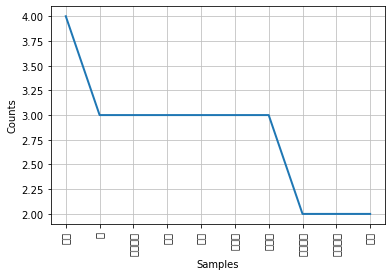

In [42]:
fdist.plot(10)